In [1]:
import os, sys
from glob import glob
import numpy as np
import dask
import xarray as xr
import xgcm
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
from mitequinox.sigp import *
from mitequinox.plot import *

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster(cores=6, walltime='08:00:00')
w = cluster.scale(2*20)

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.135.39.27:36212 Dashboard: http://10.135.39.27:8787/status,Cluster Workers: 48 Cores: 288 Memory: 399.84 GB


__________

# Read each terms

In [21]:
Tau_ELD = xr.open_zarr('/work/ALT/swot/aval/syn/xy/momentum_balance/data/TAU_H_rms.zarr')
Tau_ELD

<xarray.Dataset>
Dimensions:   (face: 13, i: 1080, j: 1080)
Coordinates:
    Depth     (face, j, i) float32 dask.array<chunksize=(4, 270, 270), meta=np.ndarray>
    XC        (face, j, i) float32 dask.array<chunksize=(4, 270, 270), meta=np.ndarray>
    YC        (face, j, i) float32 dask.array<chunksize=(4, 270, 270), meta=np.ndarray>
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i         (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * j         (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
Data variables:
    ds_TAU_H  (face, j, i) float32 dask.array<chunksize=(1, 108, 108), meta=np.ndarray>

In [8]:
E_dir = '/work/ALT/swot/aval/syn/xy/momentum_balance/daily/'
F = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

residuals_u = xr.concat([xr.open_zarr(E_dir+'residuals_u_f%02d.zarr'%(face)) for face in F], dim='face', compat='identical')
residuals_v = xr.concat([xr.open_zarr(E_dir+'residuals_v_f%02d.zarr'%(face)) for face in F], dim='face', compat='identical')

residuals_u = residuals_u.residuals_u
residuals_v = residuals_v.residuals_v

In [12]:
residuals_u

<xarray.DataArray 'residuals_u' (face: 13, time: 358, j: 1080, i: 1080)>
dask.array<concatenate, shape=(13, 358, 1080, 1080), dtype=float32, chunksize=(1, 1, 1080, 1080), chunktype=numpy.ndarray>
Coordinates:
    dtime    (time) datetime64[ns] 2011-11-23T08:00:00 ... 2012-11-14T08:00:00
    iters    (time) int64 256896 260352 263808 ... 1483776 1487232 1490688
  * time     (time) datetime64[ns] 2011-11-23T08:00:00 ... 2012-11-14T08:00:00
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * i        (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
    CS       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    YC       (face, j, i) float32 dask.arr

Text(0.5, 0, '')

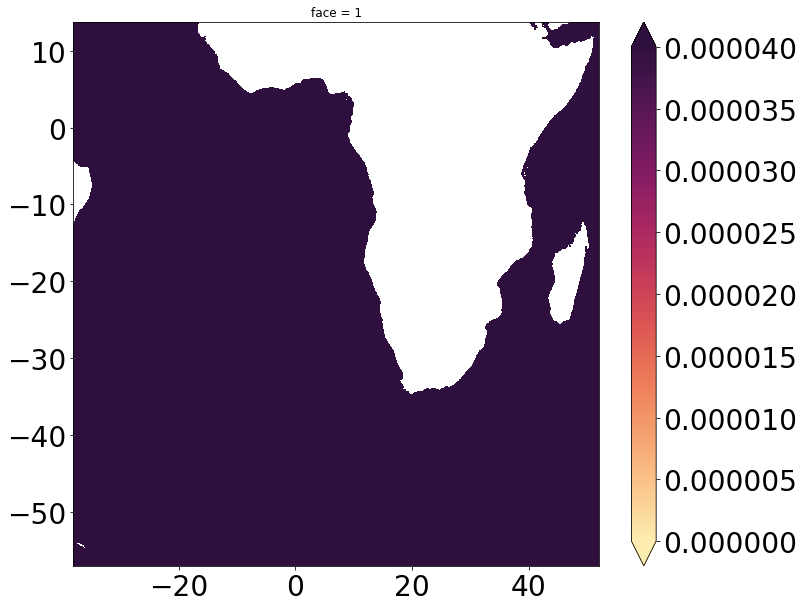

In [23]:
font_size =28
fig = plt.figure(figsize=(40,10))

ax = plt.subplot(131)
cax=Tau_ELD.ds_TAU_H.isel(face=1).plot(x='XC', y='YC',cmap=cm.matter, vmin = 0, vmax=4e-5, add_colorbar = False)
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4'])
cbar.ax.tick_params(labelsize=font_size)
#cbar.set_label(r'($\times$ 10$^{-5}$  m s$^{-2}$)', fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('',fontsize=font_size)

In [ ]:
ticks=[0, 1e-5, 2e-5, 3e-5, 4e-5]

### RMS plots

In [6]:
ds_ice = xr.open_zarr(work_data_dir+'xy/sea_ice_mask.zarr')
dij=4 
ice = ds_ice.AREA.isel(i=slice(0,None,dij), j=slice(0,None,dij)) 

In [7]:
E_dir = '/work/ALT/swot/aval/syn/xy/momentum_balance/daily/'
F = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
rms = xr.concat([xr.open_zarr(E_dir+'rms_f%02d.zarr'%(face)) for face in F], dim='face', compat='identical')
rms

<xarray.Dataset>
Dimensions:              (face: 13, i: 1080, j: 1080)
Coordinates:
  * j                    (j) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
  * i                    (i) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
    CS                   (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
    Depth                (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
    SN                   (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
    XC                   (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
    YC                   (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
  * face                 (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC                (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray>
    rA                   (face, j, i) float32 dask.array<chunksize=(1, 270, 540), meta=np.ndarray

In [10]:
font_size = 32

def plot_pretty(v, colorbar=False, title=None, label=None, vmin=None, vmax=None, savefig=None, 
                offline=False, figsize=(20,12), cmmap='thermal',
                ignore_face=[]):
    
    if vmin is None:
        vmin = v.min()
    if vmax is None:
        vmax = v.max()
    #
    MPL_LOCK = threading.Lock()
    with MPL_LOCK:
        if offline:
            plt.switch_backend('agg')
        #
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
        cmap = getattr(cm, cmmap)
        gen = (face for face in v.face.values if face not in ignore_face)
        for face in gen:
            vplt = v.sel(face=face)
            if face in [6,7,8,9]:
                # this deals with dateline crossing areas
                im = vplt.where( (vplt.XC>=0) & (vplt.XC<=180.)).plot.pcolormesh(ax=ax,                   
                                transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                                x='XC', y='YC', add_colorbar=colorbar, cmap=cmap)
                im = vplt.where(vplt.XC<=0).plot.pcolormesh(ax=ax,                   
                                transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                                x='XC', y='YC', add_colorbar=colorbar, cmap=cmap)
            else:
                im = vplt.plot.pcolormesh(ax=ax,                   
                                transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                                x='XC', y='YC', add_colorbar=colorbar, cmap=cmap)
                
        cax = plt.axes([0.925, 0.25, 0.025, 0.5])
        cb = plt.colorbar(im, cax=cax, ticks=[0, 1e-5, 2e-5, 3e-5,4e-5])
        cb.ax.set_yticklabels(['0','1','2','3','4'])
        cb.ax.tick_params(labelsize=font_size)
        ax.set_title('',fontsize=font_size)
        ax.set_xticks([-180, -135, -90, -45, 0, 45,  90, 135, 180])
        ax.set_xticklabels(['$180\degree$W','$135\degree$W','$90\degree$W','$45\degree$W','$0\degree$','$45\degree$E','$90\degree$E','$135\degree$E','$180\degree$E'])
        ax.set_ylim(-70., 70.)
        ax.set_yticks([-60, -40, -20, 0, 20, 40, 60])
        ax.set_yticklabels(['$60\degree$S','$40\degree$S','$20\degree$S','$0\degree$','$20\degree$N','$40\degree$N','$60\degree$N'])
        ax.tick_params(direction='out', length=6, width=2)
        ax.set_ylabel('',fontsize=font_size)
        ax.set_xlabel('',fontsize=font_size)
        ax.tick_params(labelsize=font_size)
        if title is not None:
            ax.set_title(title)
        if label is not None:
            cb.set_label(label=label, size=font_size)     #
        if savefig is not None:
            fig.savefig(savefig, dpi=150)
            plt.close(fig)
        #
        if not offline:
            plt.show()
            

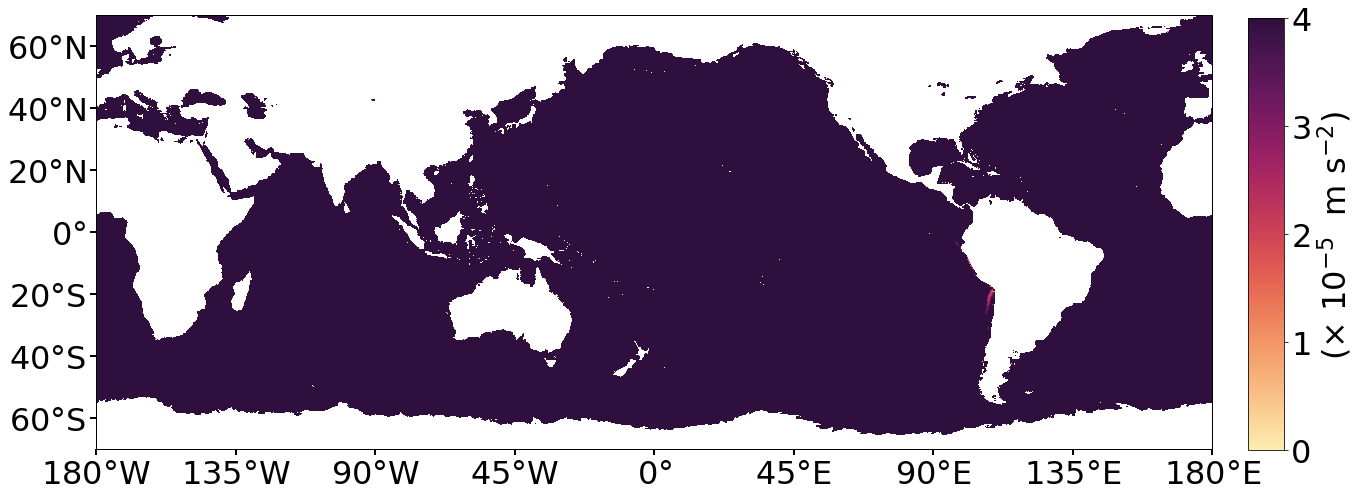

In [11]:
plot_pretty(Tau_ELD.oceTAUX_ELD_rms.where(ice>0), label=r'($\times$ 10$^{-5}$  m s$^{-2}$)', vmin=0, vmax=4e-5, cmmap='matter', ignore_face=[6])

In [24]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/uz/yux/.conda/envs/equinox/lib/python3.7/site-packages/distributed/utils.py", line 666, in log_errors
    yield
  File "/home/uz/yux/.conda/envs/equinox/lib/python3.7/site-packages/distributed/client.py", line 1276, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/uz/yux/.conda/envs/equinox/lib/python3.7/site-packages/distributed/utils.py", line 666, in log_errors
    yield
  File "/home/uz/yux/.conda/envs/equinox/lib/python3.7/site-packages/distributed/client.py", line 1005, in _reconnect
    await self._close()
  File "/home/uz/yux/.conda/envs/equinox/lib/python3.7/site-packages/distributed/client.py", line 1276, in _close
    await gen.with_timeout(timedelta(seconds=